In [1]:
import sys
import os
import pickle
sys.path.append(os.path.abspath('..'))

In [2]:
from helper import *
import statistics as stats
import matplotlib.pyplot as plt

# Device detection and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

set_seed = 42

Using device: cuda
CUDA device: NVIDIA GeForce RTX 4060 Ti
CUDA memory: 16.0 GB


In [3]:
# Function: compare average closest_cross_entropy for three similarity metrics
# Usage: call compare_avg_closest_cross_entropy(cross_results_l1, cross_results_l2, cross_results_cosine, key='closest_cross_entropy', max_k=max_knn)
import numpy as np
import matplotlib.pyplot as plt

def compare_avg_closest_cross_entropy(cross_l1, cross_l2, cross_cosine, key='closest_cross_entropy', max_k=None, title=None):
    """Compute the mean across samples for the given key (default 'closest_cross_entropy')
    for three cross_results objects and plot them together. Also prints the three
    mean series side-by-side for easy text comparison.

    Supports inputs where the key maps to:
    - a list of arrays (n_samples x n_k)
    - a numpy array (n_samples x n_k or n_k)
    - the cross_results itself may be a dict containing the key
    """
    def extract_mean(x):
        # If caller passed a dict-like object, fetch the key
        if isinstance(x, dict):
            if key not in x:
                raise KeyError(f"Key '{key}' not found in provided cross_results dict")
            v = x[key]
        else:
            v = x
        arr = np.array(v)
        if arr.ndim == 1:
            return arr
        # mean across samples (axis 0 is sample axis if shape is (n_samples, n_k))
        return arr.mean(axis=0)

    m1 = extract_mean(cross_l1)
    m2 = extract_mean(cross_l2)
    m3 = extract_mean(cross_cosine)

    # Determine length and trim to max_k if requested
    n = max(len(m1), len(m2), len(m3))
    if max_k is not None:
        n = min(n, int(max_k))
    m1 = np.asarray(m1)[:n]
    m2 = np.asarray(m2)[:n]
    m3 = np.asarray(m3)[:n]

    ks = np.arange(1, n + 1)

    plt.figure(figsize=(8, 4.5))
    plt.plot(ks, m1, label='L1', marker='o', markersize=3)
    plt.plot(ks, m2, label='L2', marker='s', markersize=3)
    plt.plot(ks, m3, label='Cosine', marker='^', markersize=3)
    plt.xlabel('k (neighbors)')
    plt.ylabel(key)
    plt.title(title or f'Average {key}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print side-by-side (tab-separated) with 4-decimals
    from itertools import zip_longest
    def fmt(a):
        return [f"{float(x):.4f}" for x in a]

    rows = zip_longest(fmt(m1), fmt(m2), fmt(m3), fillvalue='')
    print('\t'.join(['L1', 'L2', 'Cosine']))
    for r in rows:
        print('\t'.join(r))

    return {'ks': ks, 'l1': m1, 'l2': m2, 'cosine': m3}

def flatten_one_level(x):
    if not x:
        return []
    if isinstance(x[0], (list, tuple)):
        out = []
        for sub in x:
            if isinstance(sub, (list, tuple)):
                out.extend(sub)
            else:
                out.append(sub)
        return out
    return x


def summarize(closest):
    summary = {}
    for k, v in closest.items():
        vals = flatten_one_level(v)
        if vals:
            summary[k] = stats.fmean(vals)
    return summary

def xy_from_summary(summary):
    x = sorted(summary.keys())
    y_avg = [summary[k] for k in x]
    return x, y_avg

In [4]:
max_knn = 10000

## Eval of Retraining 100k

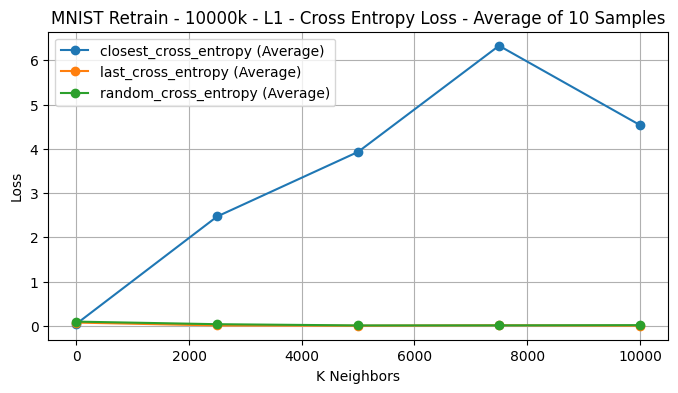

In [7]:
with open('retrain_data/10000k/l1/10_random_samples_10000k.pkl', 'rb') as f:
    random_indices_l1 = pickle.load(f)

with open('retrain_data/10000k/l1/cross_results_10000k.pkl', 'rb') as f:
    cross_results_l1 = pickle.load(f)

with open('retrain_data/10000k/l1/knn_distances_10000k.pkl', 'rb') as f:
    knn_distances_l1 = pickle.load(f)

visualize_results(cross_results_l1, random_indices_l1, average=True, normalize=False, title=f"MNIST Retrain - 10000k - L1 - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_l1, subset='closest',k=100, title="KNN Distance Statistics - L1 Similarity")

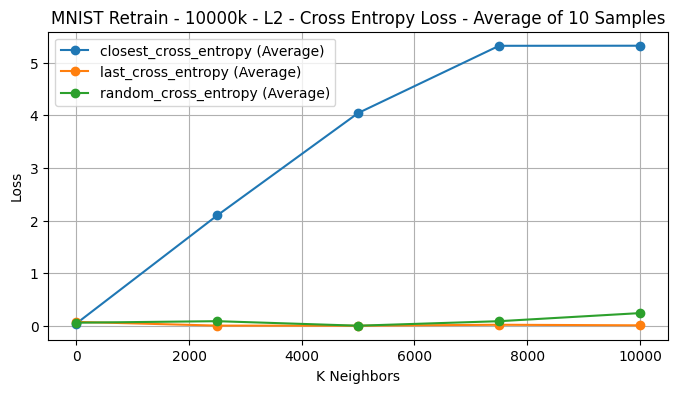

In [8]:
with open('retrain_data/10000k/l2/10_random_samples_10000k.pkl', 'rb') as f:
    random_indices_l2 = pickle.load(f)

with open('retrain_data/10000k/l2/cross_results_10000k.pkl', 'rb') as f:
    cross_results_l2 = pickle.load(f)

with open('retrain_data/10000k/l2/knn_distances_10000k.pkl', 'rb') as f:
    knn_distances_l2 = pickle.load(f)

visualize_results(cross_results_l2, random_indices_l1, average=True, normalize=False, title=f"MNIST Retrain - 10000k - L2 - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_l2, subset='closest',k=100, title="KNN Distance Statistics - L2 Similarity")

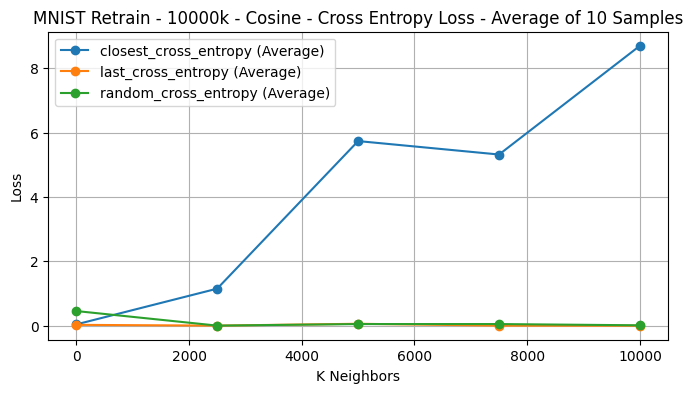

In [9]:
with open('retrain_data/10000k/cosine/10_random_samples_10000k.pkl', 'rb') as f:
    random_indices_cosine = pickle.load(f)

with open('retrain_data/10000k/cosine/cross_results_10000k.pkl', 'rb') as f:
    cross_results_cosine = pickle.load(f)

with open('retrain_data/10000k/cosine/knn_distances_10000k.pkl', 'rb') as f:
    knn_distances_cosine = pickle.load(f)

visualize_results(cross_results_cosine, random_indices_cosine, average=True, normalize=False, title=f"MNIST Retrain - 10000k - Cosine - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_cosine, subset='closest',k=100, title="KNN Distance Statistics - Cosine Similarity")

{1: 0.04262486181546592, 2500: 2.4702738956872055, 5000: 3.9301527619361876, 7500: 6.328207647800445, 10000: 4.535286247730255}
{1: 0.042451099149775476, 2500: 2.0970109843355202, 5000: 4.043257805332542, 7500: 5.321714781969786, 10000: 5.323153408244252}
{1: 0.042412571923932774, 2500: 1.1528393812957802, 5000: 5.73833636790514, 7500: 5.320639181137085, 10000: 8.701221704483032}


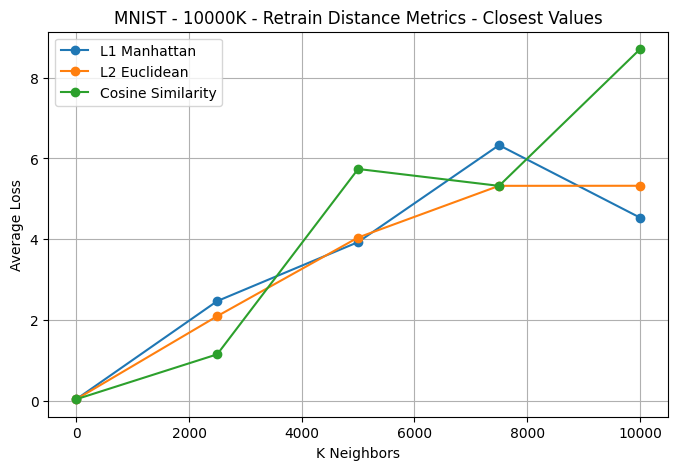

In [18]:
retrain_averages_l1 = {k: sum(v) / len(v) for k, v in cross_results_l1['closest_cross_entropy'].items()}
retrain_averages_l2 = {k: sum(v) / len(v) for k, v in cross_results_l2['closest_cross_entropy'].items()}
retrain_averages_cosine = {k: sum(v) / len(v) for k, v in cross_results_cosine['closest_cross_entropy'].items()}

print(retrain_averages_l1)
print(retrain_averages_l2)
print(retrain_averages_cosine)

datasets = [
    ("L1 Manhattan", retrain_averages_l1),
    ("L2 Euclidean", retrain_averages_l2),
    ("Cosine Similarity", retrain_averages_cosine)
]

plt.figure(figsize=(8,5))

for name, d in datasets:
    # Sort by keys to ensure correct order on x-axis
    x = sorted(d.keys())
    y = [d[k] for k in x]
    plt.plot(x, y, marker="o", label=name)

plt.title("MNIST - 10000K - Retrain Distance Metrics - Closest Values")
plt.xlabel("K Neighbors")
plt.ylabel("Average Loss")
plt.legend()
plt.grid(True)
plt.show()

1: min=163.503  max=451.788  avg=308.766
2500: min=511.22  max=1222.48  avg=944.455
5000: min=797.89  max=1384.43  avg=1097.56
7500: min=945.791  max=1482.19  avg=1184.54
10000: min=1013.39  max=1553.69  avg=1250.31


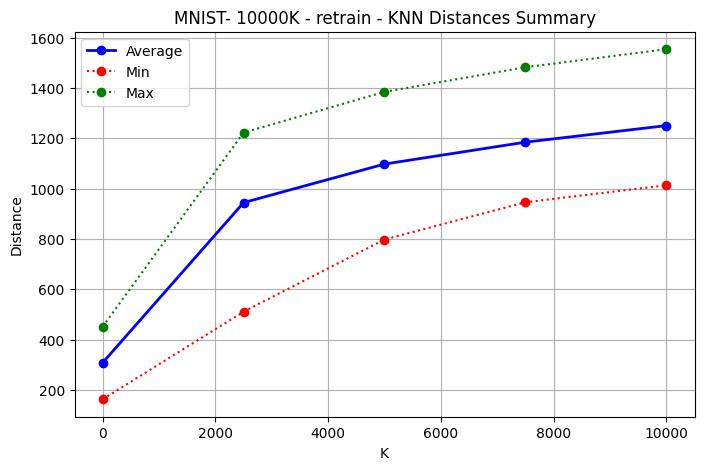

In [19]:
import statistics as stats

closest = knn_distances_l1['closest_distances']  # your dict

summary = {}
for k, v in closest.items():
    vals = flatten_one_level(v)
    if vals:  # skip empty
        summary[k] = {
            "min": min(vals),
            "max": max(vals),
            "avg": stats.fmean(vals),  # numerically robust mean
        }

# Example: print nicely, sorted by key
for k in sorted(summary):
    s = summary[k]
    print(f"{k}: min={s['min']:.6g}  max={s['max']:.6g}  avg={s['avg']:.6g}")
    
# Sort by keys
x = sorted(summary.keys())
y_min = [summary[k]["min"] for k in x]
y_max = [summary[k]["max"] for k in x]
y_avg = [summary[k]["avg"] for k in x]

plt.figure(figsize=(8,5))

# Plot avg as solid line with dots
plt.plot(x, y_avg, label="Average", color="blue", linewidth=2, marker="o")

# Plot min and max as dotted lines with dots
plt.plot(x, y_min, label="Min", color="red", linestyle="dotted", marker="o")
plt.plot(x, y_max, label="Max", color="green", linestyle="dotted", marker="o")

plt.title("MNIST- 10000K - retrain - KNN Distances Summary")
plt.xlabel("K")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

## Eval of Continue Training

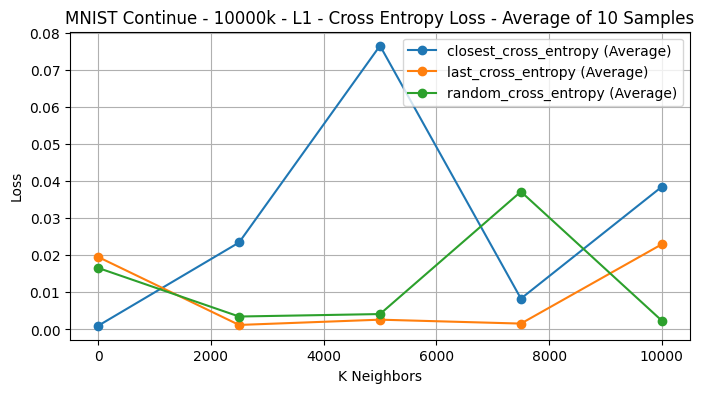

In [12]:
with open('continue_data/10000k/l1/10_random_samples_10000k.pkl', 'rb') as f:
    con_random_indices_l1 = pickle.load(f)

with open('continue_data/10000k/l1/cross_results_10000k.pkl', 'rb') as f:
    con_cross_results_l1 = pickle.load(f)

with open('continue_data/10000k/l1/knn_distances_10000k.pkl', 'rb') as f:
    con_knn_distances_l1 = pickle.load(f)

visualize_results(con_cross_results_l1, con_random_indices_l1, average=True, normalize=False, title=f"MNIST Continue - 10000k - L1 - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_l1, subset='closest',k=100, title="KNN Distance Statistics - L1 Similarity")

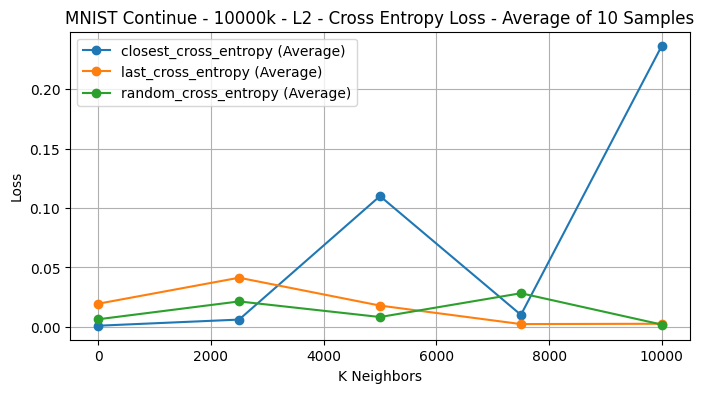

In [13]:
with open('continue_data/10000k/l2/10_random_samples_10000k.pkl', 'rb') as f:
    con_random_indices_l2 = pickle.load(f)

with open('continue_data/10000k/l2/cross_results_10000k.pkl', 'rb') as f:
    con_cross_results_l2 = pickle.load(f)

with open('continue_data/10000k/l2/knn_distances_10000k.pkl', 'rb') as f:
    con_knn_distances_l2 = pickle.load(f)

visualize_results(con_cross_results_l2, con_random_indices_l2, average=True, normalize=False, title=f"MNIST Continue - 10000k - L2 - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_l2, subset='closest',k=100, title="KNN Distance Statistics - L2 Similarity")

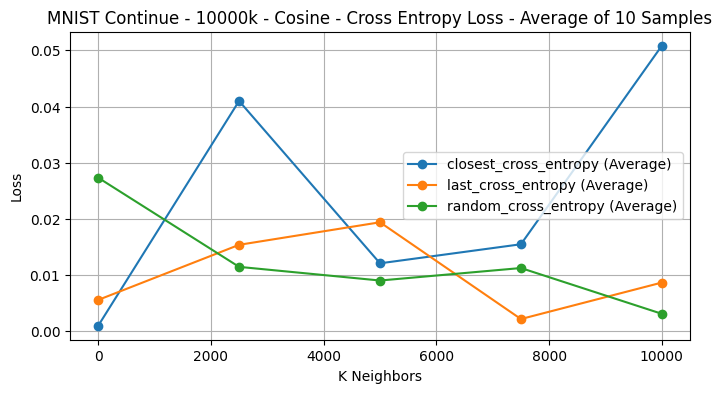

In [14]:
with open('continue_data/10000k/cosine/10_random_samples_10000k.pkl', 'rb') as f:
    con_random_indices_cosine = pickle.load(f)

with open('continue_data/10000k/cosine/cross_results_10000k.pkl', 'rb') as f:
    con_cross_results_cosine = pickle.load(f)

with open('continue_data/10000k/cosine/knn_distances_10000k.pkl', 'rb') as f:
    con_knn_distances_cosine = pickle.load(f)

visualize_results(con_cross_results_cosine, con_random_indices_cosine, average=True, normalize=False, title=f"MNIST Continue - 10000k - Cosine - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_cosine, subset='closest',k=100, title="KNN Distance Statistics - Cosine Similarity")

{1: 0.0010068589558727581, 2500: 0.023454492076279365, 5000: 0.07651119045347628, 7500: 0.008318609831303548, 10000: 0.03848379524292796}
{1: 0.0010068589558727581, 2500: 0.00616569295299243, 5000: 0.11001919598361383, 7500: 0.01014810155482948, 10000: 0.23647226777541164}
{1: 0.0010072404238485432, 2500: 0.04099660357512391, 5000: 0.01211093025547072, 7500: 0.015502635751448678, 10000: 0.050826710238106185}


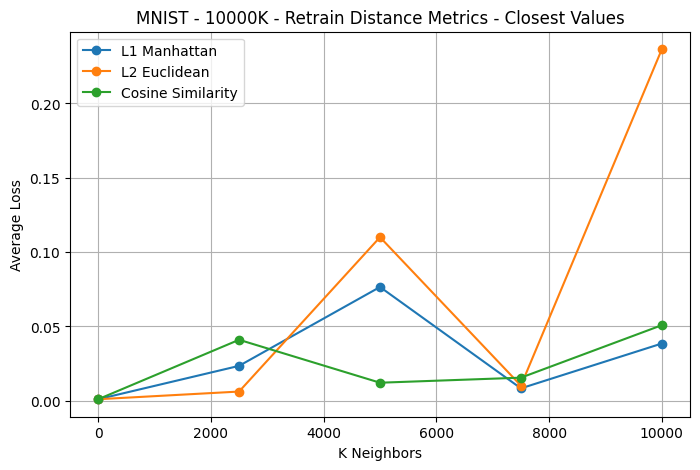

In [20]:
retrain_averages_l1 = {k: sum(v) / len(v) for k, v in con_cross_results_l1['closest_cross_entropy'].items()}
retrain_averages_l2 = {k: sum(v) / len(v) for k, v in con_cross_results_l2['closest_cross_entropy'].items()}
retrain_averages_cosine = {k: sum(v) / len(v) for k, v in con_cross_results_cosine['closest_cross_entropy'].items()}

print(retrain_averages_l1)
print(retrain_averages_l2)
print(retrain_averages_cosine)

datasets = [
    ("L1 Manhattan", retrain_averages_l1),
    ("L2 Euclidean", retrain_averages_l2),
    ("Cosine Similarity", retrain_averages_cosine)
]

plt.figure(figsize=(8,5))

for name, d in datasets:
    # Sort by keys to ensure correct order on x-axis
    x = sorted(d.keys())
    y = [d[k] for k in x]
    plt.plot(x, y, marker="o", label=name)

plt.title("MNIST - 10000K - Retrain Distance Metrics - Closest Values")
plt.xlabel("K Neighbors")
plt.ylabel("Average Loss")
plt.legend()
plt.grid(True)
plt.show()

1: min=247.042  max=672.71  avg=427.388
2500: min=547.665  max=1183.56  avg=968.998
5000: min=826.806  max=1304.56  avg=1082.05
7500: min=910.123  max=1355.93  avg=1158.9
10000: min=965.711  max=1420.73  avg=1213.46


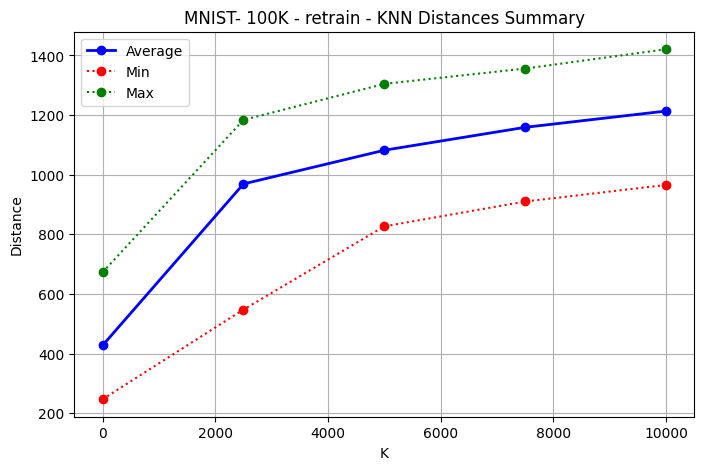

In [16]:
import statistics as stats

closest = con_knn_distances_l1['closest_distances']  # your dict

summary = {}
for k, v in closest.items():
    vals = flatten_one_level(v)
    if vals:  # skip empty
        summary[k] = {
            "min": min(vals),
            "max": max(vals),
            "avg": stats.fmean(vals),  # numerically robust mean
        }

# Example: print nicely, sorted by key
for k in sorted(summary):
    s = summary[k]
    print(f"{k}: min={s['min']:.6g}  max={s['max']:.6g}  avg={s['avg']:.6g}")
    
# Sort by keys
x = sorted(summary.keys())
y_min = [summary[k]["min"] for k in x]
y_max = [summary[k]["max"] for k in x]
y_avg = [summary[k]["avg"] for k in x]

plt.figure(figsize=(8,5))

# Plot avg as solid line with dots
plt.plot(x, y_avg, label="Average", color="blue", linewidth=2, marker="o")

# Plot min and max as dotted lines with dots
plt.plot(x, y_min, label="Min", color="red", linestyle="dotted", marker="o")
plt.plot(x, y_max, label="Max", color="green", linestyle="dotted", marker="o")

plt.title("MNIST- 100K - retrain - KNN Distances Summary")
plt.xlabel("K")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

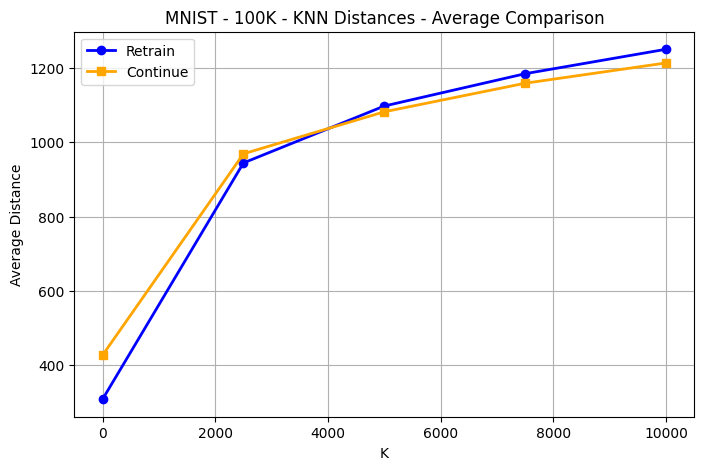

In [17]:
closest_a = knn_distances_l1['closest_distances']
closest_b = con_knn_distances_l1['closest_distances']

summary_a = summarize(closest_a)
summary_b = summarize(closest_b)

x_a, yavg_a = xy_from_summary(summary_a)
x_b, yavg_b = xy_from_summary(summary_b)

plt.figure(figsize=(8,5))

plt.plot(x_a, yavg_a, label="Retrain", color="blue", linewidth=2, marker="o")
plt.plot(x_b, yavg_b, label="Continue", color="orange", linewidth=2, marker="s")

plt.title("MNIST - 100K - KNN Distances - Average Comparison")
plt.xlabel("K")
plt.ylabel("Average Distance")
plt.legend()
plt.grid(True)
plt.show()
